# Modeling Index

In [1]:
from data_loading import load_data, create_dataloaders, split_dataset
import configuration
from modeling.Predictor import Predictor

data = load_data()

In [2]:
data = data[['Date', '_MKT']]

window_size = 104
num_features = data.shape[1] - 1


train_set, val_set, test_set = split_dataset(data, 
                                             window_size=window_size, 
                                             prediction_length=1, 
                                             look_ahead=1,
                                             scale_target=True,
                                             fixed_feature_size = None)

train_loader, val_loader, test_loader = create_dataloaders(train_set, val_set, test_set)

In [3]:
from modeling.Trainer import Trainer
from models.CNN import CNN

model = CNN(window_size=window_size, 
            num_features=num_features,
            kernel_size=21, 
            num_conv=3,
            padding=True,
            channels=3,
            hidden_size=100,
            num_hidden_layers=3,
            dropout=0
            )
trainer = Trainer(model, 
                  epochs = 200,
                  learning_rate = 1e-5) 

trained_model = trainer.train(train_loader, val_loader, print_out=True)

Epoch 1; train loss: 33.75641
Epoch 1; validation loss: 198.66388


Epoch 2; train loss: 32.601
Epoch 2; validation loss: 197.92553


Epoch 3; train loss: 31.39053
Epoch 3; validation loss: 196.17935


Epoch 4; train loss: 30.26629
Epoch 4; validation loss: 192.81709


Epoch 5; train loss: 29.22092
Epoch 5; validation loss: 185.97544

Epoch 6; train loss: 28.40598
Epoch 6; validation loss: 176.68937


Epoch 7; train loss: 27.56015
Epoch 7; validation loss: 162.44112


Epoch 8; train loss: 26.82187
Epoch 8; validation loss: 143.01579


Epoch 9; train loss: 25.98276
Epoch 9; validation loss: 122.90257


Epoch 10; train loss: 25.23566
Epoch 10; validation loss: 105.86602

Epoch 11; train loss: 24.47415
Epoch 11; validation loss: 90.55456


Epoch 12; train loss: 23.77889
Epoch 12; validation loss: 80.05248


Epoch 13; train loss: 23.05058
Epoch 13; validation loss: 71.33035


Epoch 14; train loss: 22.37157
Epoch 14; validation loss: 64.73407


Epoch 15; train loss: 21.6853
Epoch 15; valida

In [4]:
predictor = Predictor(trained_model)

preds, targs = predictor.predict(test_loader)

<class 'models.CNN.CNN'>


In [5]:
total_params = sum(p.numel() for p in model.parameters())
print("Parameter Count of Network:", total_params)

Parameter Count of Network: 49476


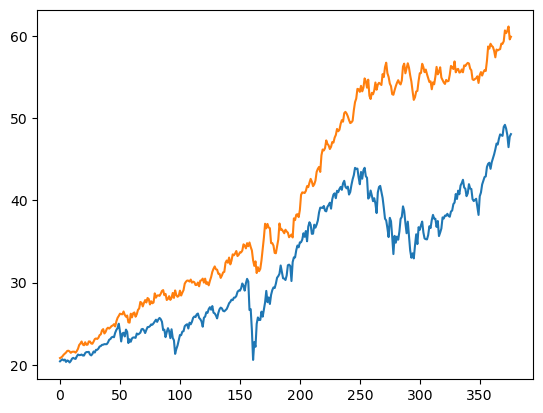

In [6]:
from matplotlib import pyplot as plt

plt.figure()

x = range(len(targs))
plt.plot(x, targs, label='Targets')
plt.plot(x, preds)
plt.show()